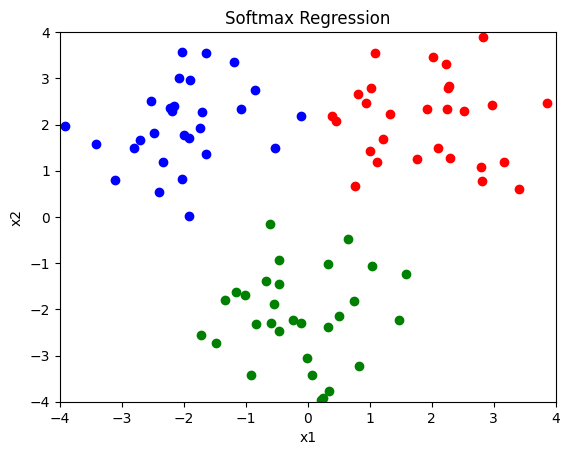

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(num):
  # 保存当前的随机数生成器状态
  state = np.random.get_state()
  np.random.seed(42)
  green = np.random.randn(num, 2) + np.array([0, -2])
  blue = np.random.randn(num, 2) + np.array([-2, 2])
  red = np.random.randn(num, 2) + np.array([2, 2])
  np.random.set_state(state)
  return green, blue, red

def plot_samples(green, blue, red):
  fig, axis = plt.subplots()
  axis.set(
    xlim=(-4, 4),
    ylim=(-4, 4),
    title="Softmax Regression",
    xlabel="x1",
    ylabel="x2"
  )
  plt.scatter(green[:,0], green[:,1], color='g')
  plt.scatter(blue[:,0], blue[:,1], color='b')
  plt.scatter(red[:,0], red[:,1], color='r')

green, blue, red = generate_data(30)
plot_samples(green, blue, red)

In [31]:
import torch
import torch.nn.init as init


class SoftMaxRegression(torch.nn.Module):
  def __init__(self, n_input, n_output):
    super(SoftMaxRegression, self).__init__()
    self.linear = torch.nn.Linear(n_input, n_output)
    init.zeros_(self.linear.weight) # 初始化权重(可选)
    init.zeros_(self.linear.bias)  # 初始化偏置(可选)

  def forward(self, x):
    return self.linear(x)


data = torch.cat([torch.tensor(green), torch.tensor(blue), torch.tensor(red)], dim=0)
label = torch.LongTensor([0]*len(green) + [1]*len(blue) + [2]*len(red))

model = SoftMaxRegression(2, 3) # 创建模型
criterion = torch.nn.CrossEntropyLoss() # 损失函数
m = len(data)
iterations = 10000

optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # 优化器

for i in range(iterations):
  optimizer.zero_grad()
  output = model(data.float())
  loss = criterion(output, label)
  loss.backward()
  optimizer.step()
  if i % 1000 == 0:
    print(f"Iteration: {i}, Loss: {loss}")

Iteration: 0, Loss: 1.0986120700836182
Iteration: 1000, Loss: 0.08316630870103836
Iteration: 2000, Loss: 0.056899137794971466
Iteration: 3000, Loss: 0.045948758721351624
Iteration: 4000, Loss: 0.039599791169166565
Iteration: 5000, Loss: 0.035331841558218
Iteration: 6000, Loss: 0.032207850366830826
Iteration: 7000, Loss: 0.029790671542286873
Iteration: 8000, Loss: 0.027845973148941994
Iteration: 9000, Loss: 0.02623545378446579


In [28]:
# 获取训练结束后的参数
weight = model.linear.weight.data.numpy()
bias = model.linear.bias.data.numpy()
weight, bias

(array([[ 0.1145499, -2.2707531],
        [-1.9728397,  1.1523801],
        [ 1.8582917,  1.118374 ]], dtype=float32),
 array([ 1.009236 , -0.5449291, -0.4643073], dtype=float32))

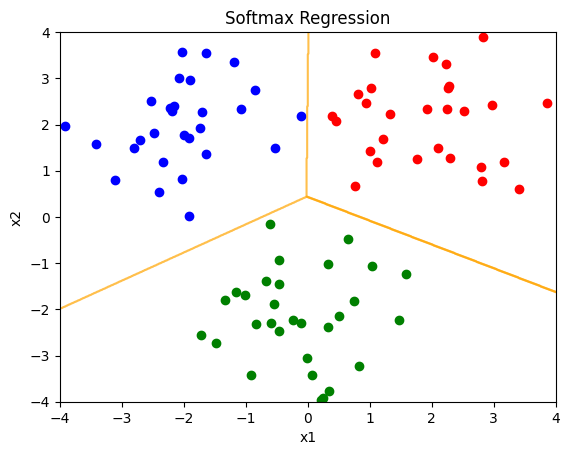

In [29]:
def plot_decision_boundary(model, data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()]).float())
    Z = torch.argmax(Z, dim=1)
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='orange', levels=[0, 1, 2], alpha=0.7)


plot_samples(green, blue, red)
plot_decision_boundary(model, data)